<a href="https://colab.research.google.com/github/marie-alixhonore/Multimedia_enjeux_technologiques/blob/main/Image_RGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice 3

In [ ]:
from PIL import Image
from io import BytesIO
from google.colab import files

In [ ]:
uploaded = files.upload()
img = Image.open(BytesIO(uploaded['fruits.jpg']))

Saving fruits.jpg to fruits.jpg


In [ ]:
import matplotlib.image as mpimg
import numpy as np
img = mpimg.imread("fruits.jpg")

Nous obtenons un tableau d'entiers avec des valeurs comprises entre 0 et 255

In [ ]:
print(img)

[[[ 52 123  67]
  [ 56 106  53]
  [ 54  71  19]
  ...
  [ 89  20  51]
  [ 86  19  54]
  [ 86  18  55]]

 [[ 47 120  64]
  [ 51 106  51]
  [ 57  80  26]
  ...
  [ 90  21  52]
  [ 88  21  56]
  [ 87  19  56]]

 [[ 43 116  61]
  [ 47 104  49]
  [ 64  93  39]
  ...
  [ 91  22  53]
  [ 89  22  57]
  [ 89  21  58]]

 ...

 [[189 211  76]
  [200 216  83]
  [214 221  83]
  ...
  [ 53  58  26]
  [ 53  58  26]
  [ 54  59  27]]

 [[182 206  70]
  [190 208  74]
  [197 205  67]
  ...
  [ 51  56  26]
  [ 51  56  26]
  [ 52  57  27]]

 [[195 219  83]
  [200 218  84]
  [188 196  58]
  ...
  [ 49  54  24]
  [ 50  55  25]
  [ 50  55  25]]]


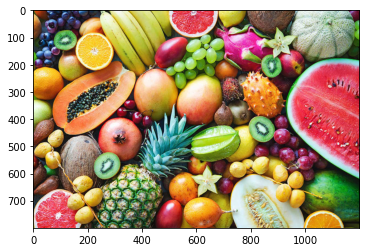

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

## 1. Décomposition d'une image en Trois images R, G et B








In [ ]:
def filtre(img_orig, couleur):
  im = np.copy(img_orig) # On fait une copie de l'original
  for i in range(im.shape[0]):
    for j in range(im.shape[1]):
      r, v, b = im[i, j]
      if couleur.upper() == "R" or couleur.upper() == "ROUGE" :
        im[i, j] = (r, 0,0)
      else : 
        if couleur.upper() == "V" or couleur.upper() =="VERT" :
          im[i, j] = (0, v,0)
        else :
          if couleur.upper() =="B" or couleur.upper() =="BLEU" :
            im[i, j] = (0, 0,b)
          else :
            print("mauvaise couleur rentrée")
  return im

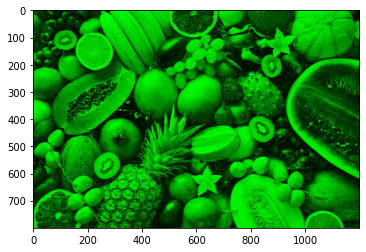

In [ ]:
img_V=filtre(img, "vert")
plt.imshow(img_V)
plt.show()

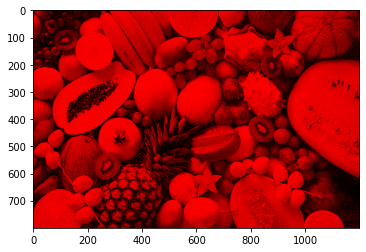

In [ ]:
img_R=filtre(img, "r")
plt.imshow(img_R)
plt.show()

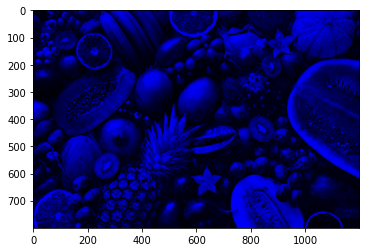

In [ ]:
img_B=filtre(img, "B")
plt.imshow(img_B)
plt.show()

## 2. Affichage du nombre de couleurs 

In [ ]:
print(img.shape)

(800, 1200, 3)


In [ ]:
couleurs = np.zeros(16777216)

In [ ]:
def nb_couleurs(img):
  couleurs = np.zeros((256,256,256))
  compteur =0
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      r, v, b = img[i, j]
      couleurs[r,v,b]+=1
  for k in range(couleurs.shape[0]) :
    for l in range(couleurs.shape[1]):
      for m in range(couleurs.shape[2]):
        if couleurs[k,l,m]!=0 :
          compteur +=1
  return compteur

In [ ]:
print(nb_couleurs(img))

574820


Il y a 574820 couleurs différentes dans notre image.

## 3. calcul du PSNR de deux images

In [ ]:
import math
import cv2

In [ ]:
uploaded = files.upload()

Saving originale.jpg to originale.jpg


In [ ]:
originale = mpimg.imread("originale.jpg")
originale.shape

(449, 398, 3)

In [ ]:
uploaded = files.upload()

Saving photoshop.jpg to photoshop (1).jpg


In [ ]:
photoshop = mpimg.imread("photoshop (1).jpg")
photoshop.shape

(449, 398, 3)

In [ ]:
def psnr(img1, img2):
  mse = np.mean((img1-img2) ** 2 )
  if mse == 0:
    return 100
  PIXEL_MAX = 255.0
  return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

d=psnr(originale,photoshop)
print(d)

32.68953970761614


## 4.1. Convertion d'une image RGB en HSV

In [241]:
def RGB_to_HSV(r, g, b) :
  R = r#/255
  G = g#/255
  B = b#/255
  c_min = min( R, G, B )
  c_max = max( R, G, B )
  delta = c_max - c_min
  
  if c_max == R :
    h = 60*(((G-B)/delta))

  elif c_max == G :
    h = 60*(((B-R)/delta)+ 2)
    
  elif c_max == B :
    h = 60*(((R-G)/delta)+ 4 )
  
  if c_max == 0:
    s = 0
  if c_max != 0 :
    s = delta/c_max

  v = c_max

  return h, s, v

In [226]:
img = mpimg.imread("fruits.jpg")
print(img)

[[[ 52 123  67]
  [ 56 106  53]
  [ 54  71  19]
  ...
  [ 89  20  51]
  [ 86  19  54]
  [ 86  18  55]]

 [[ 47 120  64]
  [ 51 106  51]
  [ 57  80  26]
  ...
  [ 90  21  52]
  [ 88  21  56]
  [ 87  19  56]]

 [[ 43 116  61]
  [ 47 104  49]
  [ 64  93  39]
  ...
  [ 91  22  53]
  [ 89  22  57]
  [ 89  21  58]]

 ...

 [[189 211  76]
  [200 216  83]
  [214 221  83]
  ...
  [ 53  58  26]
  [ 53  58  26]
  [ 54  59  27]]

 [[182 206  70]
  [190 208  74]
  [197 205  67]
  ...
  [ 51  56  26]
  [ 51  56  26]
  [ 52  57  27]]

 [[195 219  83]
  [200 218  84]
  [188 196  58]
  ...
  [ 49  54  24]
  [ 50  55  25]
  [ 50  55  25]]]


Problème ici

In [242]:

img_HSV= np.ones(img.shape, dtype=float)
#img_HSV = np.copy(img)
for i in range(img.shape[0]) :
  for j in range(img.shape[1]):
    img_HSV[i,j] = np.array([RGB_to_HSV(img[i,j,0], img[i,j,1],img[i,j,2])])
print(img_HSV)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in ubyte_scalars
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in ubyte_scalars
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.


[[[1.32676056e+02 5.77235758e-01 1.23000000e+02]
  [4.06415091e+02 5.00000000e-01 1.06000000e+02]
  [3.75000000e+02 7.32394338e-01 7.10000000e+01]
  ...
  [1.95652170e+02 7.75280893e-01 8.90000000e+01]
  [1.97910447e+02 7.79069781e-01 8.60000000e+01]
  [1.93235292e+02 7.90697694e-01 8.60000000e+01]]

 [[1.33972603e+02 6.08333349e-01 1.20000000e+02]
  [1.20000000e+02 5.18867910e-01 1.06000000e+02]
  [3.69999990e+02 6.75000012e-01 8.00000000e+01]
  ...
  [1.95652170e+02 7.66666651e-01 9.00000000e+01]
  [1.97910447e+02 7.61363626e-01 8.80000000e+01]
  [1.93235292e+02 7.81609178e-01 8.70000000e+01]]

 [[1.34794520e+02 6.29310369e-01 1.16000000e+02]
  [1.22105263e+02 5.48076928e-01 1.04000000e+02]
  [3.76666660e+02 5.80645144e-01 9.30000000e+01]
  ...
  [1.95652170e+02 7.58241773e-01 9.10000000e+01]
  [1.97910447e+02 7.52808988e-01 8.90000000e+01]
  [1.93235292e+02 7.64044940e-01 8.90000000e+01]]

 ...

 [[1.83555558e+02 6.39810443e-01 2.11000000e+02]
  [1.82706764e+02 6.15740716e-01 2.1600

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


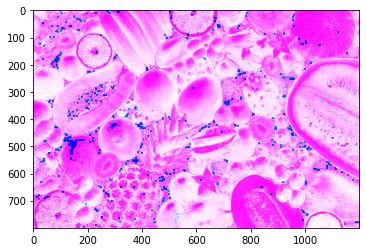

In [243]:
plt.imshow(img_HSV)
plt.show()

## 4.2. Conversion HSV en RGB

In [ ]:
import math

In [244]:
def HSV_to_RGB(h, s, v) :
  c=v*s
  R=0
  G =0
  B=0
  x=c*(1-abs((h/60)%2-1))
  m=v-c
  #print(h)
  if h <=60 and h>0 :
    R=c
    G=x
    B=0
  if h <= 120 and h>60:
    R=x
    G=c
    B=0
  if h <= 180 and h>120 :
    R=0
    G=c
    B=x
  if h <= 240 and h>180 :
    R=0
    G=x
    B=c
  if h <= 300 and h>240 :
    R=x
    G=0
    B=c
  elif h <= 360 and h>300 :
    R=c
    G=0
    B=x

  r = (R+m)#*255
  g = (G+m)#*255
  b = (B+m)#*255
  return r, g, b

In [245]:
img_RGB= np.ones(img.shape, dtype=int)
#img_RGB = np.copy(img_HSV)
for i in range(im.shape[0]) :
  for j in range(im.shape[1]):
    img_RGB[i,j] = np.array([HSV_to_RGB(img_HSV[i,j,0], img_HSV[i,j,1], img_HSV[i,j,2])])
print(img_RGB)


[[[ 52 123  67]
  [ 53  53  53]
  [ 19  19  19]
  ...
  [ 20  71  89]
  [ 18  66  86]
  [ 17  71  86]]

 [[ 46 120  63]
  [ 51 106  51]
  [ 25  25  25]
  ...
  [ 21  72  90]
  [ 21  68  88]
  [ 19  72  87]]

 [[ 42 116  60]
  [ 46 104  48]
  [ 39  39  39]
  ...
  [ 21  73  91]
  [ 22  69  89]
  [ 21  74  89]]

 ...

 [[ 75 202 211]
  [ 83 210 216]
  [ 82 221 208]
  ...
  [ 26  26  26]
  [ 26  26  26]
  [ 26  26  26]]

 [[ 70 197 206]
  [ 73 202 208]
  [ 66 205 193]
  ...
  [ 26  26  26]
  [ 26  26  26]
  [ 26  26  26]]

 [[ 82 210 219]
  [ 83 212 218]
  [ 57 196 184]
  ...
  [ 23  23  23]
  [ 24  24  24]
  [ 24  24  24]]]


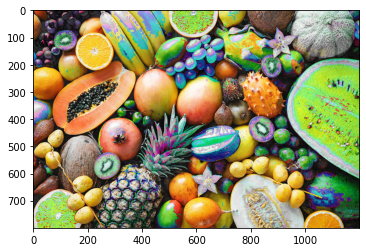

In [246]:
plt.imshow(img_RGB)
plt.show()

On remarque que la photo est quasiment identique: le spectre des couleurs est plus restreint. La conversion n'est pas exacte dans les deux sens.

Comparaison du résultat avec l'image d'origine :

In [247]:
print(img-img_RGB)

[[[   0    0    0]
  [   3   53    0]
  [  35   52    0]
  ...
  [  69  -51  -38]
  [  68  -47  -32]
  [  69  -53  -31]]

 [[   1    0    1]
  [   0    0    0]
  [  32   55    1]
  ...
  [  69  -51  -38]
  [  67  -47  -32]
  [  68  -53  -31]]

 [[   1    0    1]
  [   1    0    1]
  [  25   54    0]
  ...
  [  70  -51  -38]
  [  67  -47  -32]
  [  68  -53  -31]]

 ...

 [[ 114    9 -135]
  [ 117    6 -133]
  [ 132    0 -125]
  ...
  [  27   32    0]
  [  27   32    0]
  [  28   33    1]]

 [[ 112    9 -136]
  [ 117    6 -134]
  [ 131    0 -126]
  ...
  [  25   30    0]
  [  25   30    0]
  [  26   31    1]]

 [[ 113    9 -136]
  [ 117    6 -134]
  [ 131    0 -126]
  ...
  [  26   31    1]
  [  26   31    1]
  [  26   31    1]]]


## 5.1. Conversion RGB en YUV

In [214]:
def RGB_to_YUV(r, g, b) :
	y = 0.299*r + 0.587*g + 0.114*b
	u = 0.493*(b-y)
	v = 0.877*(r-y)

	return y, u, v


In [219]:
img_YUV = np.ones(img.shape, dtype=float)
#img_YUV= np.copy(img)
for i in range(img_YUV.shape[0]) :
  for j in range(img_YUV.shape[1]):
    img_YUV[i,j] = np.array([RGB_to_YUV(img[i,j,0], img[i,j,1], img[i,j,2])])
print(img_YUV)

[[[ 9.5387000e+01 -1.3994791e+01 -3.8050399e+01]
  [ 8.5008000e+01 -1.5779944e+01 -2.5440016e+01]
  [ 5.9989000e+01 -2.0207577e+01 -5.2523530e+00]
  ...
  [ 4.4165000e+01  3.3696550e+00  3.9320295e+01]
  [ 4.3023000e+01  5.4116610e+00  3.7690829e+01]
  [ 4.2550000e+01  6.1378500e+00  3.8105650e+01]]

 [[ 9.1789000e+01 -1.3699977e+01 -3.9279953e+01]
  [ 8.3285000e+01 -1.5916505e+01 -2.8313945e+01]
  [ 6.6967000e+01 -2.0196731e+01 -8.7410590e+00]
  ...
  [ 4.5165000e+01  3.3696550e+00  3.9320295e+01]
  [ 4.5023000e+01  5.4116610e+00  3.7690829e+01]
  [ 4.3550000e+01  6.1378500e+00  3.8105650e+01]]

 [[ 8.7903000e+01 -1.3263179e+01 -3.9379931e+01]
  [ 8.0687000e+01 -1.5621691e+01 -2.9543499e+01]
  [ 7.8173000e+01 -1.9312289e+01 -1.2429721e+01]
  ...
  [ 4.6165000e+01  3.3696550e+00  3.9320295e+01]
  [ 4.6023000e+01  5.4116610e+00  3.7690829e+01]
  [ 4.5550000e+01  6.1378500e+00  3.8105650e+01]]

 ...

 [[ 1.8903200e+02 -5.5724776e+01 -2.8064000e-02]
  [ 1.9605400e+02 -5.5735622e+01  3.460

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


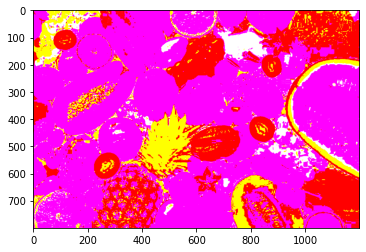

In [220]:
plt.imshow(img_YUV)
plt.show()

## 5.2. Conversion YUV en RGB

In [221]:
def YUV_to_RGB(y, u, v) :
	r = y + 1.140*v
	g = y - (0.395*u) - (0.581*v)
	b = y + (2.032*u)

	return r, g, b

In [222]:
np.ones(img.shape, dtype=float)
#img_RGB = np.copy(img_YUV)
for i in range(img_YUV.shape[0]) :
  for j in range(img_YUV.shape[1]):
    img_RGB[i,j] = np.array([YUV_to_RGB(img_YUV[i,j,0], img_YUV[i,j,1], img_YUV[i,j,2])])
print(img_RGB)

[[[ 52 123  66]
  [ 56 106  52]
  [ 54  71  18]
  ...
  [ 88  19  51]
  [ 85  18  54]
  [ 85  17  55]]

 [[ 47 120  63]
  [ 51 106  50]
  [ 57  80  25]
  ...
  [ 89  20  52]
  [ 87  20  56]
  [ 86  18  56]]

 [[ 43 116  60]
  [ 47 104  48]
  [ 64  93  38]
  ...
  [ 90  21  53]
  [ 88  21  57]
  [ 88  20  58]]

 ...

 [[189 211  75]
  [199 216  82]
  [213 221  82]
  ...
  [ 52  58  25]
  [ 52  58  25]
  [ 53  59  26]]

 [[182 206  69]
  [189 208  73]
  [196 205  66]
  ...
  [ 51  56  25]
  [ 51  56  25]
  [ 52  57  26]]

 [[195 219  82]
  [199 218  83]
  [187 196  57]
  ...
  [ 49  54  23]
  [ 50  55  24]
  [ 50  55  24]]]


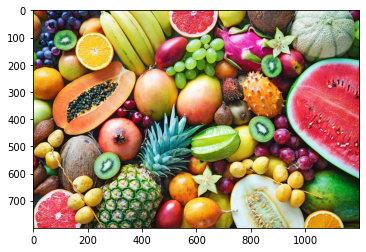

In [223]:
plt.imshow(img_RGB)
plt.show()

L'image est identique à quelques pixels près. La conversion dans les deux sens fonctionne bien.

Comparaison de l'image en RGB d'origine et celle obtenue par la convertion

In [224]:
print(img-img_RGB)

[[[0 0 1]
  [0 0 1]
  [0 0 1]
  ...
  [1 1 0]
  [1 1 0]
  [1 1 0]]

 [[0 0 1]
  [0 0 1]
  [0 0 1]
  ...
  [1 1 0]
  [1 1 0]
  [1 1 0]]

 [[0 0 1]
  [0 0 1]
  [0 0 1]
  ...
  [1 1 0]
  [1 1 0]
  [1 1 0]]

 ...

 [[0 0 1]
  [1 0 1]
  [1 0 1]
  ...
  [1 0 1]
  [1 0 1]
  [1 0 1]]

 [[0 0 1]
  [1 0 1]
  [1 0 1]
  ...
  [0 0 1]
  [0 0 1]
  [0 0 1]]

 [[0 0 1]
  [1 0 1]
  [1 0 1]
  ...
  [0 0 1]
  [0 0 1]
  [0 0 1]]]


# Exercice 4

In [ ]:
uploaded = files.upload()
im_100 = mpimg.imread("100 (1).jpg")

Saving 100.jpg to 100 (2).jpg


In [ ]:
uploaded = files.upload()
im_90 = mpimg.imread("90.jpg")

Saving 90.jpg to 90.jpg


In [ ]:
uploaded = files.upload()
im_80 = mpimg.imread("80.jpg")

Saving 80.jpg to 80.jpg


In [ ]:
uploaded = files.upload()
im_70 = mpimg.imread("70.jpg")

Saving 70.jpg to 70.jpg


In [ ]:
uploaded = files.upload()
im_60 = mpimg.imread("60.jpg")

Saving 60.jpg to 60.jpg


In [ ]:
uploaded = files.upload()
im_50 = mpimg.imread("50.jpg")

Saving 50.jpg to 50.jpg


In [ ]:
uploaded = files.upload()
im_40 = mpimg.imread("40.jpg")

Saving 40.jpg to 40.jpg


In [ ]:
uploaded = files.upload()
im_30 = mpimg.imread("30.jpg")

Saving 30.jpg to 30.jpg


In [ ]:
uploaded = files.upload()
im_20 = mpimg.imread("20.jpg")

Saving 20.jpg to 20.jpg


In [ ]:
uploaded = files.upload()
im_10 = mpimg.imread("10.jpg")

Saving 10.jpg to 10.jpg


In [ ]:
images = np.array([im_10, im_20, im_30, im_40, im_50, im_60, im_70, im_80, im_90])

## 1. PSNR

In [ ]:
for i in range(images.shape[0]) :
  print(psnr(i, im_100))

27.82715738778962
27.822071477862544
27.81487317205506
27.81167716226012
27.81109721623443
27.807617289711757
27.80932090069801
27.81505453171986
27.823064425252447


## 2. Nombre de couleurs 

In [ ]:
for im in range(images.shape[0]) :
  print(nb_couleurs(images[im]))
print(nb_couleurs(im_100))

214808
425311
520515
549428
556164
561383
567790
566209
566011
557573


## 3. Taille du fichier

In [ ]:
import os
size_100 = os.path.getsize( "100.jpg" )
print(size_100)
size_90 = os.path.getsize( "90.jpg" )
print(size_90) 
size_80 = os.path.getsize( "80.jpg" )
print(size_80)
size_70 = os.path.getsize( "70.jpg" )
print(size_70)
size_60 = os.path.getsize( "60.jpg" )
print(size_60)
size_50 = os.path.getsize( "50.jpg" )
print(size_50)
size_40 = os.path.getsize( "40.jpg" )
print(size_40)
size_30 = os.path.getsize( "30.jpg" )
print(size_30)
size_20 = os.path.getsize( "20.jpg" )
print(size_20)
size_10 = os.path.getsize( "10.jpg" )
print(size_10)
sizes = np.array([size_10, size_20, size_30, size_40, size_50, size_60, size_70, size_80, size_90])

9223610
367445
292639
257367
227926
205181
179768
148424
107294
63138


## 4. Taux de compression

In [ ]:
for i in range(sizes.shape[0]) :
  print(100 * (size_100 - sizes[i] ) / size_100)


99.31547409311538
98.83674613302166
98.39082528424338
98.0510017227528
97.77548053311014
97.52888511114412
97.20969338469428
96.82728346059731
96.0162561079664
